#  <span style="color:orange">INFO40975 Artificial Intelligence - Bank Marketing</span>

**Created using: PyCaret 2.0** <br />
**Date: December 3, 2022**

# 1.0 Installing PyCaret

In [ ]:
# installing PyCaret
!pip install pycaret

# to display interactive visuals
from pycaret.utils import enable_colab
enable_colab()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Colab mode enabled.


# 2.0 Dataset

For this research project, the **Bank Marketing Dataset** from UCI will be used. This research project seeks to classify the bank client as having subscribed to a term deposit or not. It contains 21 variables and a short descriptions of each column are as follows:

- **age:** numeric
- **job:** type of job
- **marital:** marital status
- **education:** categorical
- **default:** has credit in default?
- **housing:** has housing loan?
- **loan:** has personal loan?
- **contact:** contact communication type
- **month:** last contact month of year
- **day_of_week:** last contact day of the week
- **duration:** last contact duration
- **campaign:** number of contacts performed during this campaign and for this client
- **pdays:** number of days that passed by after client was last contacted from a previous campaign
- **previous:** number of contacts performed before this campaign and for this client
- **poutcome:** outcome of previous marketing campaign
- **emp.var.rate:** employment variation rate
- **cons.price.idx:** consumer price index
- **cons.conf.idx:** consumer confidence index
- **euribor3m:** euribor 3 month rate
- **nr.employed:** number of employees
- **y:** has client subscribed to term deposit? `Target Column`

# Dataset Acknowledgement:
Creator: S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

The original dataset and data dictionary can be __[found here.](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)__ 

# 3.0 Getting the Data

In [ ]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip -q bank-additional.zip

import pandas as pd
dataset = pd.read_csv('/content/bank-additional/bank-additional-full.csv', sep=';')
dataset

replace bank-additional/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
#shape of data
dataset.shape

(41188, 21)

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (37069, 21)
Unseen Data For Predictions: (4119, 21)


# 4.0 Setting up the Environment in PyCaret

In [ ]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'y', session_id=123) 

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(37069, 21)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='y',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

# 5.0 Comparing All Models

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9191,0.9496,0.5587,0.6564,0.6030,0.5583,0.5609,0.469
gbc,Gradient Boosting Classifier,0.9181,0.9469,0.5289,0.6598,0.5868,0.5420,0.5462,4.587
rf,Random Forest Classifier,0.9131,0.9401,0.4462,0.6551,0.5305,0.4845,0.4955,2.797
lr,Logistic Regression,0.9114,0.9326,0.4091,0.6572,0.5038,0.4581,0.4739,3.319
ada,Ada Boost Classifier,0.9105,0.9385,0.4010,0.6512,0.4956,0.4496,0.4659,1.136
lda,Linear Discriminant Analysis,0.9105,0.9352,0.5124,0.6119,0.5573,0.5080,0.5107,0.352
ridge,Ridge Classifier,0.9089,0.0000,0.3282,0.6792,0.4420,0.3989,0.4306,0.061
knn,K Neighbors Classifier,0.9068,0.8721,0.4865,0.5933,0.5344,0.4832,0.4863,1.273
et,Extra Trees Classifier,0.9037,0.9175,0.3503,0.6101,0.4445,0.3960,0.4146,3.317
dummy,Dummy Classifier,0.8900,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.040


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


# 6.0 Create a Model

# 6.1 Decision Tree Classifier

In [ ]:
dt = create_model('dt')
print(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8855,0.7327,0.5368,0.4811,0.5075,0.4429,0.4438
1,0.8998,0.7515,0.5614,0.5424,0.5517,0.4953,0.4954
2,0.8929,0.7353,0.5333,0.5118,0.5223,0.4620,0.4622
3,0.8940,0.7429,0.5490,0.5182,0.5331,0.4734,0.4736
4,0.8802,0.7152,0.5035,0.4601,0.4808,0.4132,0.4138
5,0.8848,0.7055,0.4755,0.4772,0.4764,0.4116,0.4116
6,0.8956,0.7376,0.5350,0.5258,0.5303,0.4716,0.4716
7,0.8890,0.7232,0.5105,0.4966,0.5034,0.4410,0.4410
8,0.8874,0.7276,0.5228,0.4885,0.5051,0.4417,0.4420


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


# 6.2 K Neighbors Classifier

In [ ]:
knn = create_model('knn')
print(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9044,0.8752,0.4807,0.5781,0.5249,0.4723,0.4748
1,0.9106,0.8999,0.5123,0.6109,0.5573,0.5080,0.5104
2,0.9006,0.8623,0.4526,0.5584,0.5000,0.4455,0.4485
3,0.9052,0.8690,0.4860,0.5840,0.5305,0.4783,0.4808
4,0.9083,0.8757,0.5140,0.5976,0.5526,0.5019,0.5036
5,0.9056,0.8589,0.4510,0.5945,0.5129,0.4617,0.4671
6,0.9114,0.8738,0.5210,0.6157,0.5644,0.5154,0.5177
7,0.9091,0.8784,0.4755,0.6126,0.5354,0.4859,0.4907
8,0.9067,0.8705,0.4702,0.5956,0.5255,0.4746,0.4786


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


# 6.3 Logistic Regression

In [ ]:
lr = create_model('lr')
print(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9106,0.9242,0.4140,0.6448,0.5043,0.4577,0.4713
1,0.9152,0.9390,0.4000,0.6994,0.5089,0.4663,0.4881
2,0.9133,0.9260,0.4140,0.6705,0.5119,0.4673,0.4836
3,0.9114,0.9399,0.4336,0.6458,0.5188,0.4721,0.4835
4,0.9137,0.9350,0.4406,0.6632,0.5294,0.4840,0.4963
5,0.9040,0.9230,0.3706,0.6057,0.4599,0.4105,0.4255
6,0.9102,0.9388,0.4091,0.6464,0.5011,0.4545,0.4689
7,0.9141,0.9360,0.3881,0.6981,0.4989,0.4560,0.4796
8,0.9113,0.9324,0.3930,0.6627,0.4934,0.4483,0.4667


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# 6.4 Best Model

In [ ]:
best = create_model(best)
print(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9102,0.9435,0.5263,0.6048,0.5629,0.5131,0.5146
1,0.9195,0.9535,0.5544,0.6583,0.6019,0.5575,0.5600
2,0.9210,0.9467,0.5719,0.6626,0.6139,0.5702,0.5721
3,0.9214,0.9517,0.5769,0.6653,0.6180,0.5744,0.5762
4,0.9229,0.9526,0.6119,0.6629,0.6364,0.5933,0.5939
5,0.9110,0.9456,0.5490,0.6062,0.5761,0.5266,0.5274
6,0.9225,0.9509,0.5874,0.6693,0.6257,0.5827,0.5842
7,0.9202,0.9525,0.5140,0.6837,0.5868,0.5437,0.5504
8,0.9233,0.9490,0.5333,0.6972,0.6044,0.5627,0.5689


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


# 7.0 Tune a Model

# 7.1 Decision Tree Classifier

In [ ]:
tuned_dt = tune_model(dt)
print(tuned_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9160,0.9282,0.4772,0.6634,0.5551,0.5101,0.5185
1,0.9156,0.9349,0.4877,0.6557,0.5594,0.5138,0.5207
2,0.9091,0.9157,0.5684,0.5891,0.5786,0.5276,0.5277
3,0.9148,0.9241,0.6154,0.6132,0.6143,0.5664,0.5664
4,0.9114,0.9268,0.5105,0.6186,0.5594,0.5106,0.5135
5,0.9087,0.9210,0.5210,0.5984,0.5570,0.5064,0.5079
6,0.9152,0.9317,0.5490,0.6331,0.5880,0.5410,0.5427
7,0.9210,0.9307,0.5594,0.6695,0.6095,0.5660,0.5688
8,0.9183,0.9224,0.4702,0.6872,0.5583,0.5150,0.5263


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


# 7.2 K Neighbors Classifier

In [ ]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})
print(tuned_knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9141,0.9208,0.4842,0.6449,0.5531,0.5066,0.5130
1,0.9179,0.9334,0.4842,0.6765,0.5644,0.5205,0.5294
2,0.9098,0.9136,0.4807,0.6143,0.5394,0.4902,0.4947
3,0.9171,0.9344,0.5140,0.6592,0.5776,0.5325,0.5375
4,0.9141,0.9335,0.5140,0.6364,0.5687,0.5215,0.5252
5,0.9121,0.9280,0.4441,0.6480,0.5270,0.4804,0.4908
6,0.9114,0.9258,0.4790,0.6284,0.5437,0.4956,0.5012
7,0.9202,0.9335,0.4825,0.7005,0.5714,0.5291,0.5403
8,0.9152,0.9258,0.4526,0.6684,0.5397,0.4949,0.5064


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=38, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=38, p=2,
                     weights='uniform')


# 7.3 Logistic Regression

In [ ]:
tuned_lr = tune_model(lr)
print(tuned_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9125,0.9264,0.4070,0.6667,0.5054,0.4605,0.4774
1,0.9148,0.9390,0.4000,0.6951,0.5078,0.4649,0.4862
2,0.9129,0.9283,0.4175,0.6648,0.5129,0.4678,0.4831
3,0.9114,0.9397,0.4371,0.6443,0.5208,0.4740,0.4848
4,0.9137,0.9350,0.4406,0.6632,0.5294,0.4840,0.4963
5,0.9067,0.9253,0.3881,0.6236,0.4784,0.4303,0.4449
6,0.9094,0.9386,0.4056,0.6409,0.4968,0.4498,0.4640
7,0.9141,0.9361,0.3776,0.7059,0.4920,0.4498,0.4761
8,0.9133,0.9327,0.4035,0.6765,0.5055,0.4613,0.4798


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# 7.4 Best Model

In [ ]:
tuned_best = tune_model(best)
print(tuned_best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9121,0.9424,0.5018,0.6245,0.5564,0.5083,0.5120
1,0.9175,0.9538,0.5368,0.6511,0.5885,0.5431,0.5462
2,0.9164,0.9450,0.5368,0.6429,0.5851,0.5390,0.5417
3,0.9218,0.9521,0.5594,0.6751,0.6119,0.5688,0.5719
4,0.9218,0.9515,0.6014,0.6590,0.6289,0.5853,0.5860
5,0.9133,0.9465,0.5245,0.6276,0.5714,0.5236,0.5262
6,0.9198,0.9513,0.5280,0.6741,0.5922,0.5484,0.5535
7,0.9195,0.9495,0.5000,0.6842,0.5778,0.5345,0.5425
8,0.9187,0.9472,0.5018,0.6745,0.5755,0.5315,0.5387


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


# 8.0 Plot a Model

# 8.1 Confusion Matrix

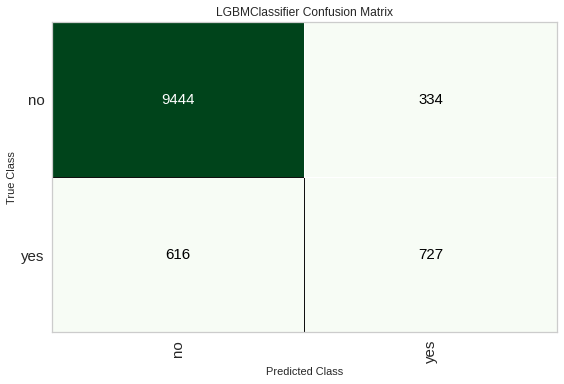

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_best, plot = 'confusion_matrix')

# 8.2 Classification Report

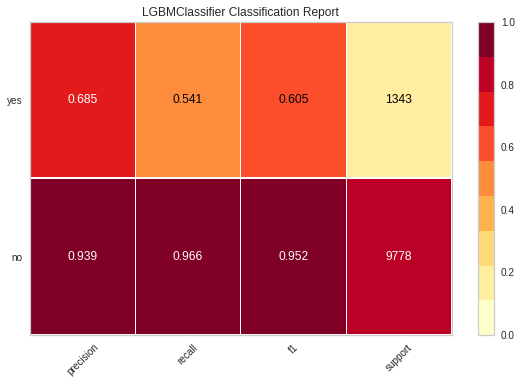

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_best, plot = 'class_report')

# 8.3 Decision Boundary Plot

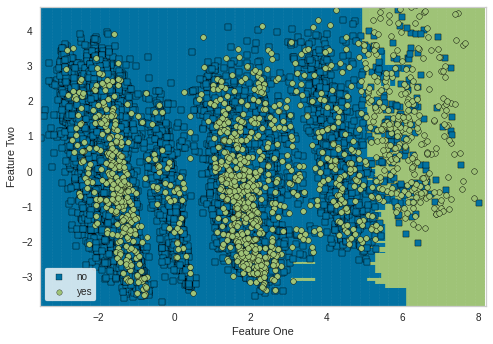

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_best, plot='boundary')

# 8.4 Prediction Error Plot

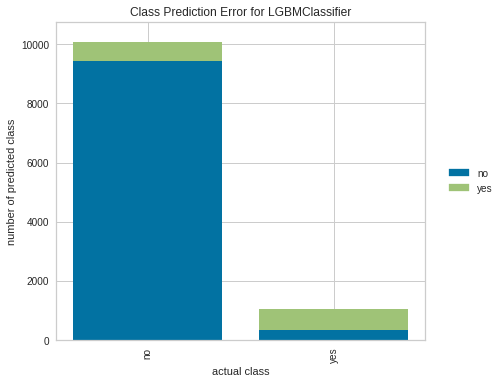

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_best, plot = 'error')

In [50]:
evaluate_model(tuned_best)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 9.0 Predict on test / hold-out Sample

In [ ]:
predict_model(tuned_best);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9146,0.9495,0.5413,0.6852,0.6048,0.5577,0.5625


# 10.0 Finalize Model for Deployment

In [ ]:
final_best = finalize_model(tuned_best)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
      

In [ ]:
print(final_best)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


# 11.0 Predict on unseen data

In [ ]:
unseen_predictions = predict_model(final_best, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0,0.9432,0,0,0,0,0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Label,Score
0,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9985
1,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9986
2,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9987
3,39,housemaid,married,basic.4y,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9970
4,55,blue-collar,married,basic.4y,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9973


# 12.0 Saving the model

In [ ]:
save_model(final_best,'Final Best Model: LightGBM 03Dec2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), model_name=Final Best Model: LightGBM 03Dec2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
            

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='y',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                 colsample_bytree=1.0, feature_fraction=0.9,
                                 importance_type='split', learning_rate=0.05,
                                 max_depth=-1, min_child_samples=96,
                                 min_child_weight=

# 13.0 Loading the saved model

In [ ]:
saved_final_best = load_model('Final Best Model: LightGBM 03Dec2022')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final Best Model: LightGBM 03Dec2022, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_best, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='y',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                                colsample_bytree=1.0, feature_fraction=0.9,
                                importance_type='split', learning_rate=0.05,
                                max_depth=-1, min_child_sampl

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0,0.9432,0,0,0,0,0


In [ ]:
new_prediction.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Label,Score
0,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9985
1,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9986
2,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9987
3,39,housemaid,married,basic.4y,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9970
4,55,blue-collar,married,basic.4y,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9973
